In [130]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

In [122]:
x = [2,6,8,8,12,16,20,20,22,26]
y = [58,105,88,118,117,137,157,169,149,202]

In [139]:
#Normalize data
x = normalize(np.array(x).reshape(1,-1)).squeeze()
y = normalize(np.array(y).reshape(1,-1)).squeeze()

In [140]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(3.0)
        self.b = tf.Variable(5.0)

    def __call__(self, x):
        return self.W * x + self.b

model = Model()


In [141]:
def loss(y_predict, y_true):
    return tf.reduce_mean(tf.square((y_predict - y_true)))

def train(model, x, y, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(x), y)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(dW * learning_rate)
    model.b.assign_sub(db * learning_rate)

In [142]:
model = Model()

Ws, bs = [],[]
error = 1000
#epochs = range(5000)
#for epoch in epochs:
while error > 0.01:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(x), y)
    train(model, x, y, learning_rate = 0.001)
    error = current_loss
    print(f"Run: {len(Ws)}--- W={Ws[-1]:.2f} b={bs[-1]:.2f} current_loss = {current_loss:.5f}")


Run: 1--- W=3.00 b=5.00 current_loss = 30.74453
Run: 2--- W=3.00 b=4.99 current_loss = 30.61205
Run: 3--- W=2.99 b=4.98 current_loss = 30.48014
Run: 4--- W=2.99 b=4.97 current_loss = 30.34880
Run: 5--- W=2.99 b=4.96 current_loss = 30.21803
Run: 6--- W=2.98 b=4.94 current_loss = 30.08781
Run: 7--- W=2.98 b=4.93 current_loss = 29.95817
Run: 8--- W=2.98 b=4.92 current_loss = 29.82907
Run: 9--- W=2.97 b=4.91 current_loss = 29.70054
Run: 10--- W=2.97 b=4.90 current_loss = 29.57256
Run: 11--- W=2.97 b=4.89 current_loss = 29.44514
Run: 12--- W=2.97 b=4.88 current_loss = 29.31826
Run: 13--- W=2.96 b=4.87 current_loss = 29.19193
Run: 14--- W=2.96 b=4.86 current_loss = 29.06614
Run: 15--- W=2.96 b=4.85 current_loss = 28.94089
Run: 16--- W=2.95 b=4.84 current_loss = 28.81619
Run: 17--- W=2.95 b=4.83 current_loss = 28.69202
Run: 18--- W=2.95 b=4.82 current_loss = 28.56839
Run: 19--- W=2.94 b=4.80 current_loss = 28.44529
Run: 20--- W=2.94 b=4.79 current_loss = 28.32273
Run: 21--- W=2.94 b=4.78 curr

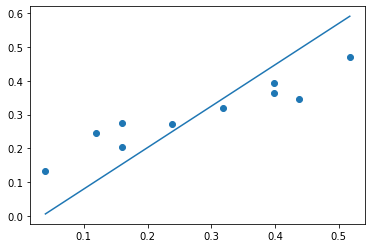

In [143]:
px = [x[0], x[-1]]
py = [Ws[-1] * x[0] + bs[-1], Ws[-1] * x[-1] + bs[-1]]
plt.plot(px, py)
plt.scatter(x,y)